<a href="https://colab.research.google.com/github/Mananpatel25/Mydatascienceproject/blob/main/EDA_and_Time_series_analysis_of_Online_Transactions_in_UK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Online-Retail-Transactions-of-UK**
Analyzing the Online Transactions in UK and the countries who are purchase stuff from them.


### **Context**


Typically e-commerce datasets are proprietary and consequently hard to find among publicly available data. However, The UCI Machine Learning Repository has made this dataset containing actual transactions from 2010 and 2011. The dataset is maintained on their site, where it can be found by the title "Online Retail".

### **Content**

"This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers."

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Excel file containing Data of Online Retails

In [3]:
df = pd.read_excel('/content/drive/MyDrive/Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.shape

(541909, 8)

In [ ]:
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
101493,544921,22548,HEADS AND TAILS SPORTING FUN,12,2011-02-24 16:35:00,1.25,17090.0,United Kingdom
373068,569261,22965,3 TRADITIONAl BISCUIT CUTTERS SET,2,2011-10-03 11:34:00,2.10,17321.0,United Kingdom
426705,573362,23521,WALL ART CAT AND BIRD,12,2011-10-30 13:06:00,2.89,12597.0,Spain
444057,574720,21034,REX CASH+CARRY JUMBO SHOPPER,2,2011-11-06 14:39:00,0.95,14547.0,United Kingdom
169612,551194,21888,BINGO SET,1,2011-04-27 11:12:00,3.75,14606.0,United Kingdom


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

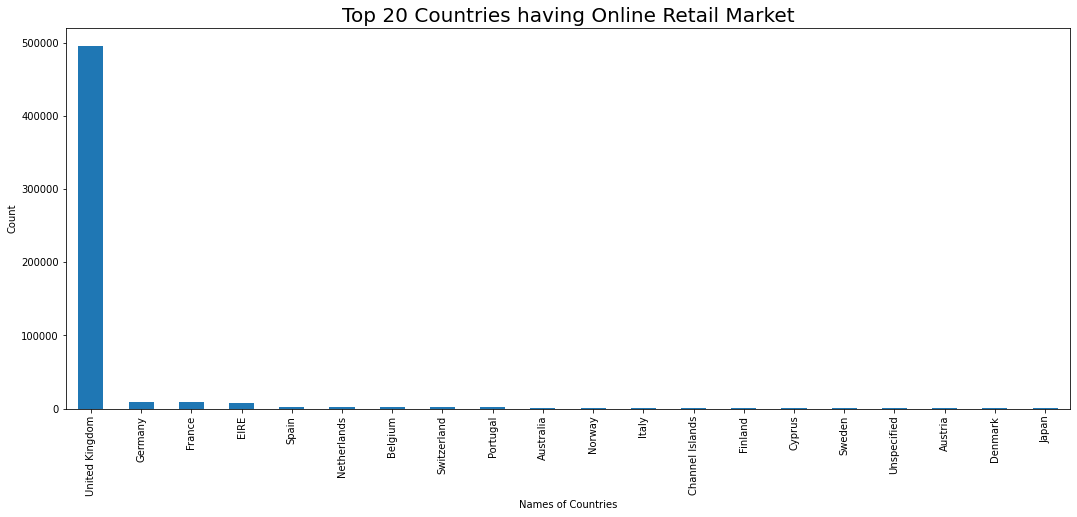

In [ ]:
df['Country'].value_counts().head(20).plot.bar(figsize = (18, 7))
plt.title('Top 20 Countries having Online Retail Market', fontsize = 20)
plt.xlabel('Names of Countries')
plt.ylabel('Count')
plt.show()

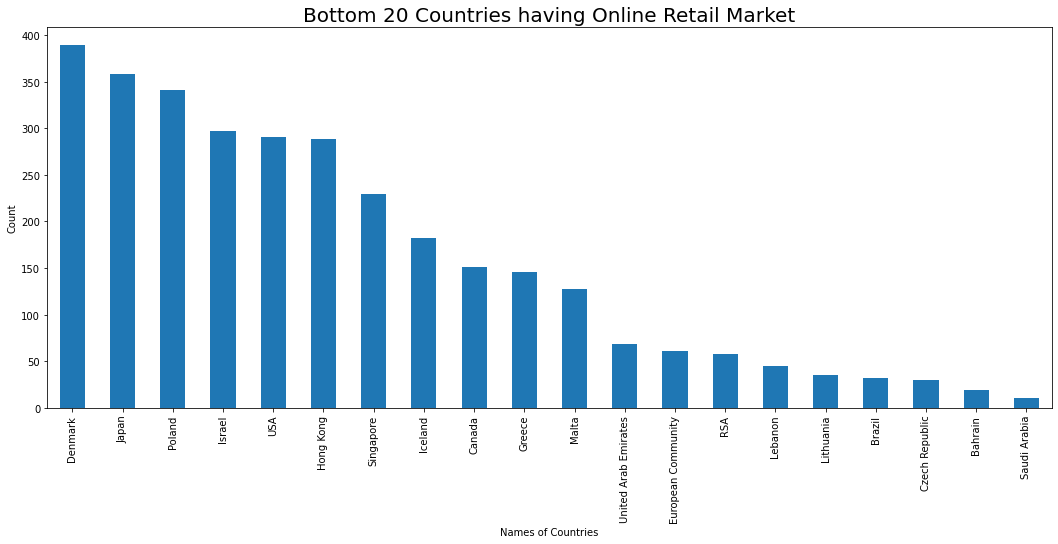

In [ ]:
df['Country'].value_counts().tail(20).plot.bar(figsize = (18, 7))
plt.title('Bottom 20 Countries having Online Retail Market', fontsize = 20)
plt.xlabel('Names of Countries')
plt.ylabel('Count')
plt.show()

In [ ]:
df['Quantity'].groupby(df['Country']).agg('sum')

Country
Australia                 83653
Austria                    4827
Bahrain                     260
Belgium                   23152
Brazil                      356
Canada                     2763
Channel Islands            9479
Cyprus                     6317
Czech Republic              592
Denmark                    8188
EIRE                     142637
European Community          497
Finland                   10666
France                   110480
Germany                  117448
Greece                     1556
Hong Kong                  4769
Iceland                    2458
Israel                     4353
Italy                      7999
Japan                     25218
Lebanon                     386
Lithuania                   652
Malta                       944
Netherlands              200128
Norway                    19247
Poland                     3653
Portugal                  16180
RSA                         352
Saudi Arabia                 75
Singapore                  5234


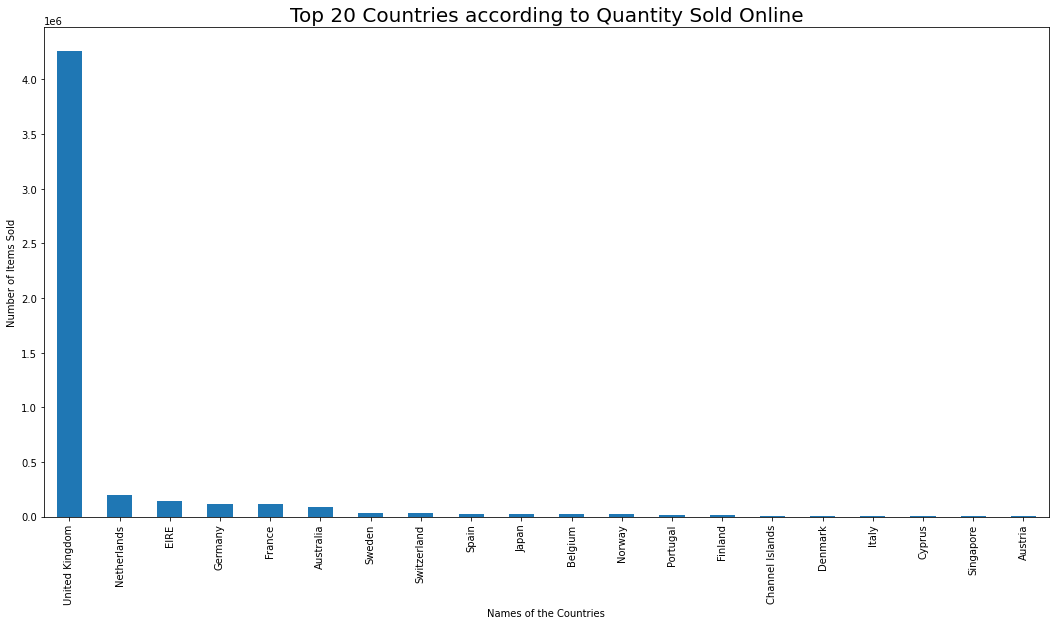

In [ ]:
df['Quantity'].groupby(df['Country']).agg('sum').sort_values(ascending=False).head(20).plot.bar(figsize=(18,9))
plt.title('Top 20 Countries according to Quantity Sold Online', fontsize = 20)
plt.xlabel('Names of the Countries')
plt.ylabel('Number of Items Sold')
plt.show()

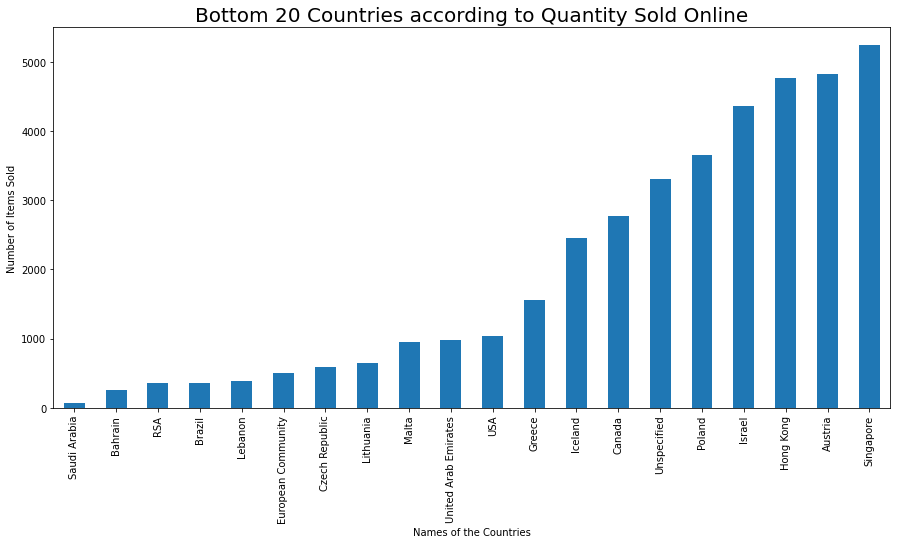

In [ ]:
df['Quantity'].groupby(df['Country']).agg('sum').sort_values(ascending = True).head(20).plot.bar(figsize = (15, 7))

plt.title('Bottom 20 Countries according to Quantity Sold Online', fontsize = 20)
plt.xlabel('Names of the Countries')
plt.ylabel('Number of Items Sold')
plt.show()

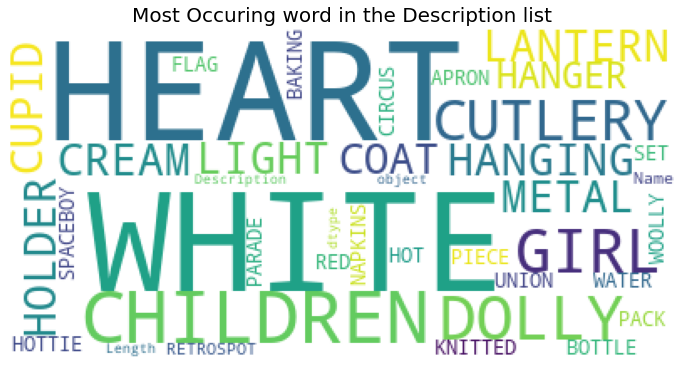

In [ ]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'white').generate(str(df['Description']))

print(wordcloud)
plt.rcParams['figure.figsize'] = (12, 12)
plt.axis('off')
plt.imshow(wordcloud)
plt.title('Most Occuring word in the Description list', fontsize = 20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


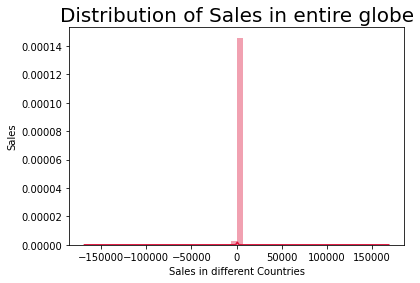

In [4]:
df['Sales'] = df['UnitPrice'] * df['Quantity']

# visualizing the sales in the entire world
sns.distplot(df['Sales'], color = 'crimson')
plt.title('Distribution of Sales in entire globe', fontsize = 20)
plt.xlabel('Sales in different Countries')
plt.ylabel('Sales')
plt.show()

In [ ]:
df['Sales'].groupby(df['Country']).agg('sum').sort_values(ascending = False)

Country
United Kingdom          8187806.364
Netherlands              284661.540
EIRE                     263276.820
Germany                  221698.210
France                   197403.900
Australia                137077.270
Switzerland               56385.350
Spain                     54774.580
Belgium                   40910.960
Sweden                    36595.910
Japan                     35340.620
Norway                    35163.460
Portugal                  29367.020
Finland                   22326.740
Channel Islands           20086.290
Denmark                   18768.140
Italy                     16890.510
Cyprus                    12946.290
Austria                   10154.320
Hong Kong                 10117.040
Singapore                  9120.390
Israel                     7907.820
Poland                     7213.140
Unspecified                4749.790
Greece                     4710.520
Iceland                    4310.000
Canada                     3666.380
Malta               

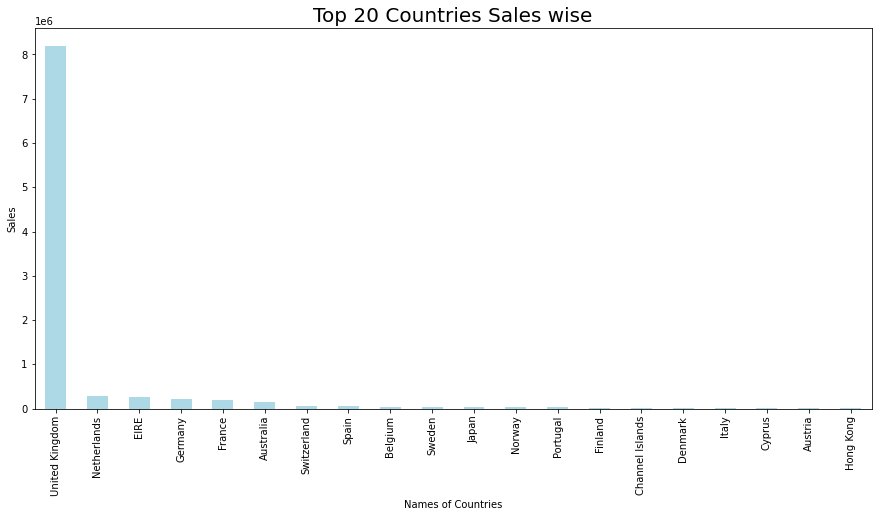

In [ ]:
df['Sales'].groupby(df['Country']).agg('sum').sort_values(ascending = False).head(20).plot.bar(figsize = (15, 7), color = 'lightblue')
plt.title('Top 20 Countries Sales wise', fontsize = 20)
plt.xlabel('Names of Countries')
plt.ylabel('Sales')
plt.show()

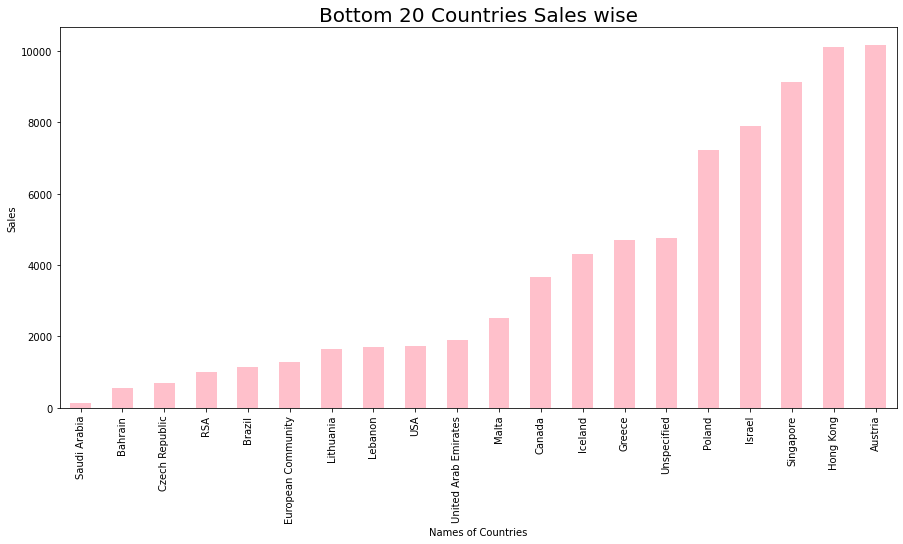

In [ ]:
df['Sales'].groupby(df['Country']).agg('sum').sort_values(ascending = True).head(20).plot.bar(figsize = (15, 7), color = 'pink')
plt.title('Bottom 20 Countries Sales wise', fontsize = 20)
plt.xlabel('Names of Countries')
plt.ylabel('Sales')
plt.show()

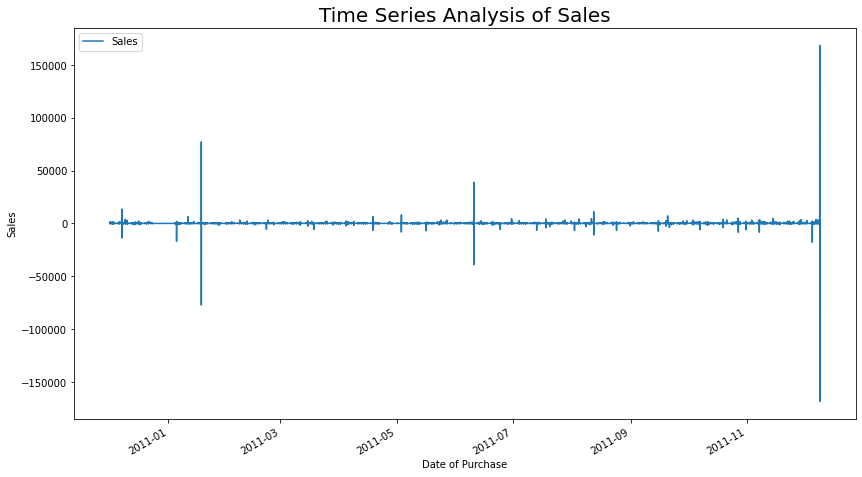

In [ ]:
plt.rcParams['figure.figsize'] = (14, 8)
df.plot(x = 'InvoiceDate', y = 'Sales')
plt.title("Time Series Analysis of Sales", fontsize = 20)
plt.xlabel('Date of Purchase')
plt.ylabel('Sales')
plt.show()

In [ ]:
# checking no of unique customer IDs

x = df['CustomerID'].nunique()

print("There are {} number of different customers".format(x))

There are 4372 number of different customers


In [ ]:
# checking number of unique countries present in this dataset

x = df['Country'].nunique()

print("There are {} number of different countries who do online retailing from UK".format(x))

There are 38 number of different countries who do online retailing from UK


Text(0.5, 1.0, 'Time-Series plot for UK')

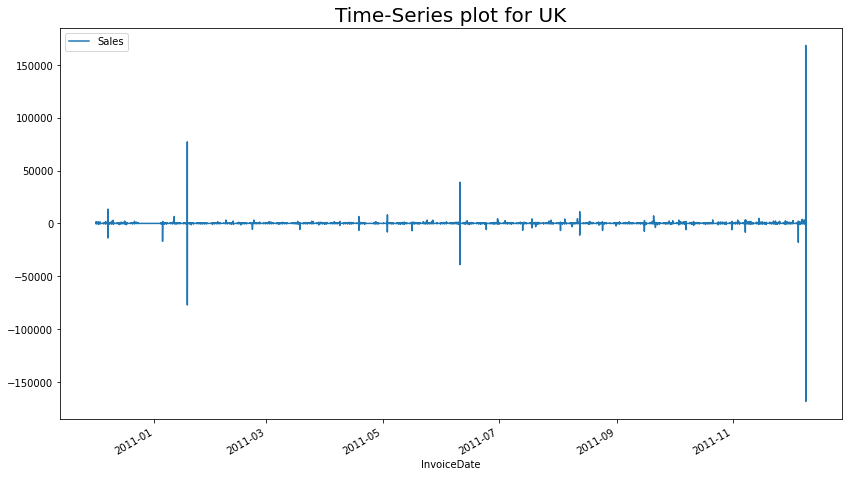

In [ ]:
# defining a function to plot time-series plot for any country
def time_series(country):
  dataset = df[df['Country'] == country]
  dataset.plot(x = 'InvoiceDate', y = 'Sales')
  
  
time_series('United Kingdom')
plt.title('Time-Series plot for UK', fontsize = 20)

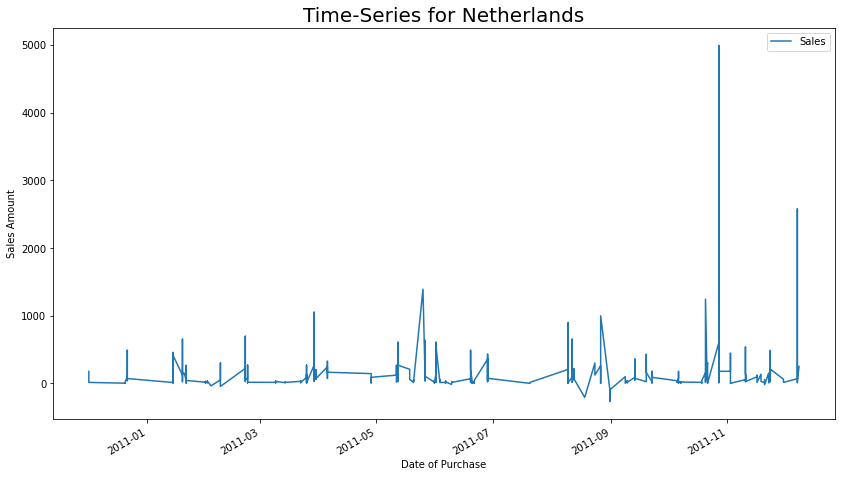

In [ ]:
# time-series plot for netherlands

dataset = df[df['Country'] == 'Netherlands']
dataset.plot(x = 'InvoiceDate', y = 'Sales')
plt.title('Time-Series for Netherlands', fontsize = 20)
plt.xlabel('Date of Purchase')
plt.ylabel('Sales Amount')
plt.show()

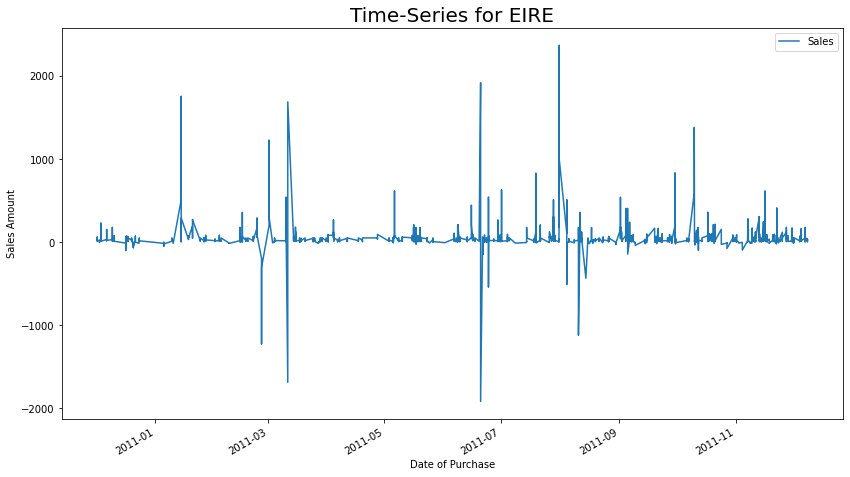

In [ ]:
# time-series plot for EIRE

dataset = df[df['Country'] == 'EIRE']
dataset.plot(x = 'InvoiceDate', y = 'Sales')
plt.title('Time-Series for EIRE', fontsize = 20)
plt.xlabel('Date of Purchase')
plt.ylabel('Sales Amount')
plt.show()

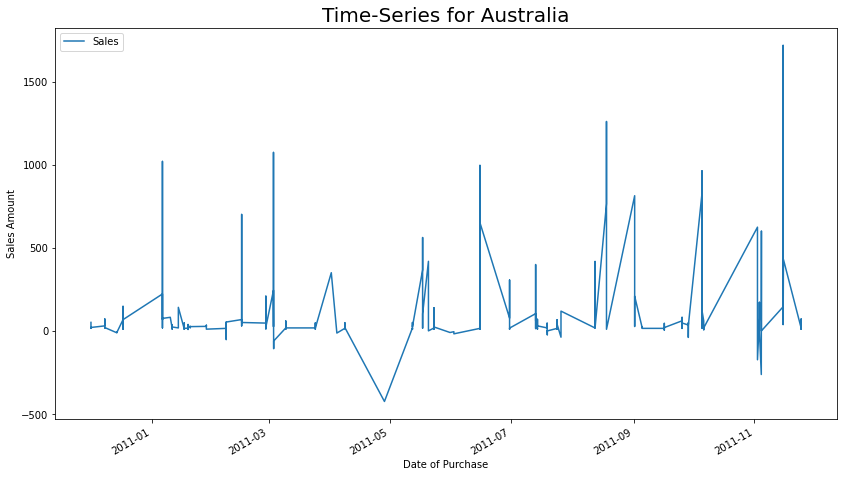

In [ ]:
# time-series plot for Australia

dataset = df[df['Country'] == 'Australia']
dataset.plot(x = 'InvoiceDate', y = 'Sales')
plt.title('Time-Series for Australia', fontsize = 20)
plt.xlabel('Date of Purchase')
plt.ylabel('Sales Amount')
plt.show()

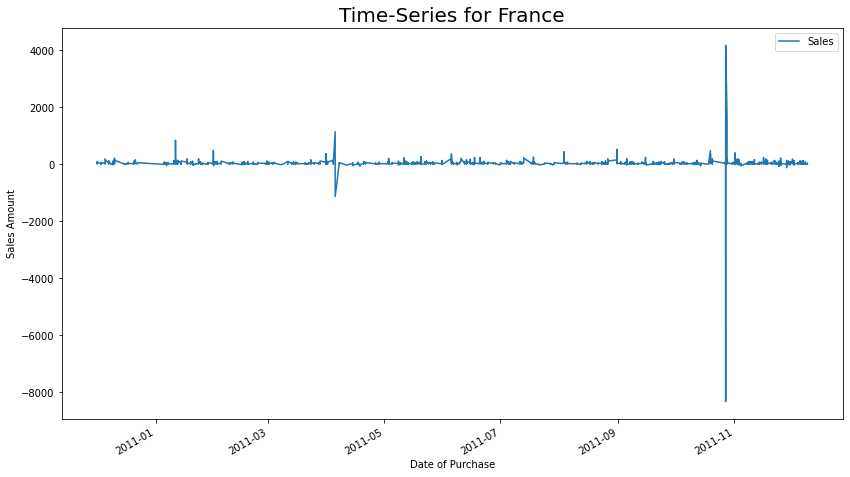

In [ ]:
# time-series plot for France

dataset = df[df['Country'] == 'France']
dataset.plot(x = 'InvoiceDate', y = 'Sales')
plt.title('Time-Series for France', fontsize = 20)
plt.xlabel('Date of Purchase')
plt.ylabel('Sales Amount')
plt.show()


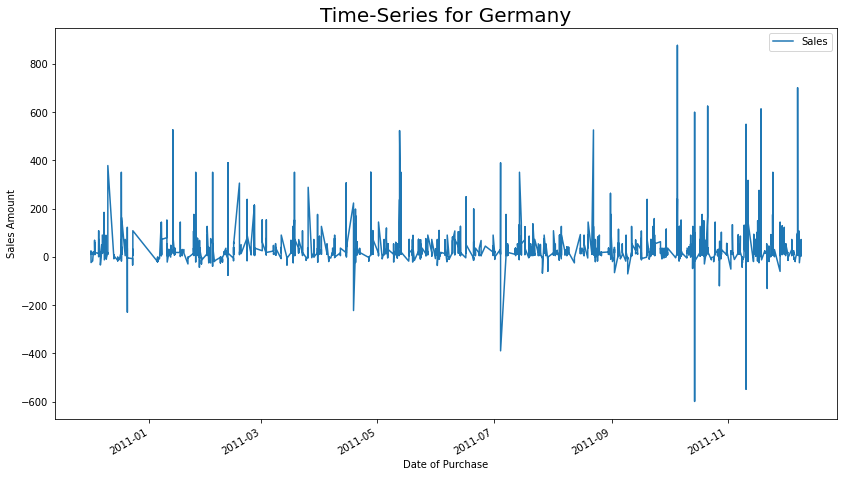

In [ ]:
# time-series plot for Germany

dataset = df[df['Country'] == 'Germany']
dataset.plot(x = 'InvoiceDate', y = 'Sales')
plt.title('Time-Series for Germany', fontsize = 20)
plt.xlabel('Date of Purchase')
plt.ylabel('Sales Amount')
plt.show()


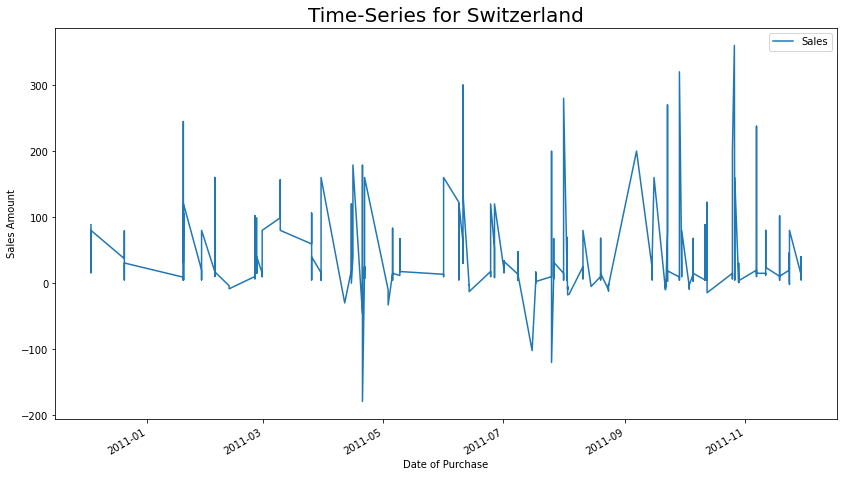

In [ ]:
# time-series plot for Switzlerland

dataset = df[df['Country'] == 'Switzerland']
dataset.plot(x = 'InvoiceDate', y = 'Sales')
plt.title('Time-Series for Switzerland', fontsize = 20)
plt.xlabel('Date of Purchase')
plt.ylabel('Sales Amount')
plt.show()


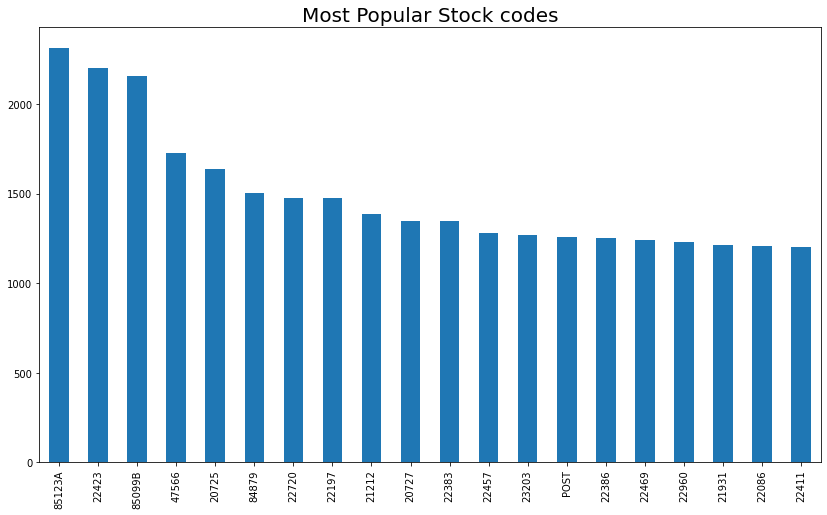

In [ ]:
# Checking the stockcodes for the data in the dataset

df['StockCode'].value_counts().head(20).plot.bar()
plt.title('Most Popular Stock codes', fontsize = 20)
plt.show()

In [ ]:
df.sort_values(by = 'Sales')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom,-168469.60
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,-77183.60
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.00,15098.0,United Kingdom,-38970.00
524602,C580605,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:36:00,17836.46,NaN,United Kingdom,-17836.46
43702,C540117,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:55:00,16888.02,NaN,United Kingdom,-16888.02
...,...,...,...,...,...,...,...,...,...
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom,11062.06
15017,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom,13541.33
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.50,15098.0,United Kingdom,38970.00
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.60


In [ ]:
df.sort_values(by = 'UnitPrice')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,-11062.06
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,-11062.06
40984,539750,22652,TRAVEL SEWING KIT,1,2010-12-21 15:40:00,0.00,NaN,United Kingdom,0.00
52217,540696,84562A,NaN,1,2011-01-11 09:14:00,0.00,NaN,United Kingdom,0.00
52262,540699,POST,NaN,1000,2011-01-11 09:32:00,0.00,NaN,United Kingdom,0.00
...,...,...,...,...,...,...,...,...,...
16356,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541.33,NaN,United Kingdom,-13541.33
43703,C540118,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:57:00,16453.71,NaN,United Kingdom,-16453.71
43702,C540117,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:55:00,16888.02,NaN,United Kingdom,-16888.02
524602,C580605,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:36:00,17836.46,NaN,United Kingdom,-17836.46


In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID,Sales
count,541909.000000,541909.000000,406829.000000,541909.000000
mean,9.552250,4.611114,15287.690570,17.987795
std,218.081158,96.759853,1713.600303,378.810824
min,-80995.000000,-11062.060000,12346.000000,-168469.600000
25%,1.000000,1.250000,13953.000000,3.400000
50%,3.000000,2.080000,15152.000000,9.750000
75%,10.000000,4.130000,16791.000000,17.400000
max,80995.000000,38970.000000,18287.000000,168469.600000


In [13]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Sales               0
dtype: int64

In [14]:
#REMOVING NULL VALUES BCOZ OF ITS ABNORMALLY LARGE PRESENCE.
df.dropna(inplace=True)
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Sales          0
dtype: int64

In [15]:
df.shape

(406829, 9)

In [16]:
df.corr()

,Quantity,UnitPrice,CustomerID,Sales
Quantity,1.000000,-0.001238,-0.003600,0.916096
UnitPrice,-0.001238,1.000000,-0.004560,-0.129296
CustomerID,-0.003600,-0.004560,1.000000,-0.002274
Sales,0.916096,-0.129296,-0.002274,1.000000


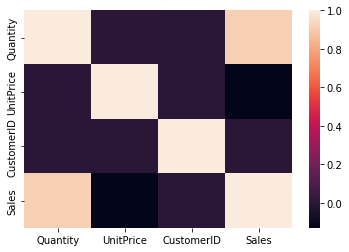

In [17]:
sns.heatmap(df.corr())